In [1]:
using Pkg

In [2]:
using PyPlot, StatsBase, LaTeXStrings, Distributions 

In [20]:
y = [242,237,231,201]
x = [0.02,0.07,0.11,0.15];


In [21]:
x = x .-mean(x);

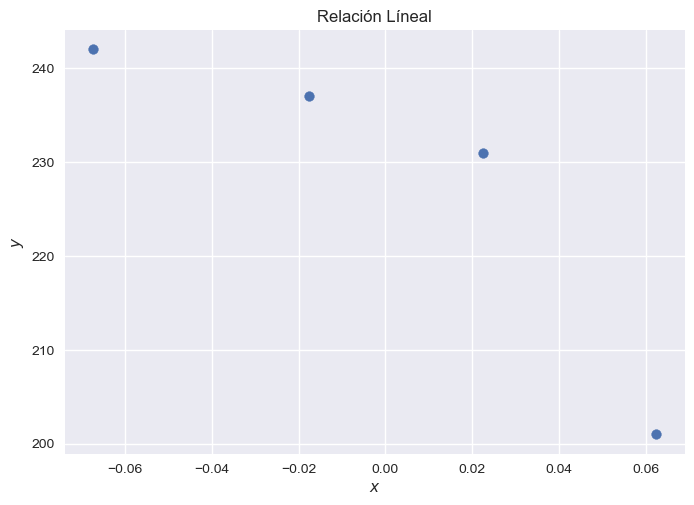

In [22]:
plt.style.use("seaborn")
##Relación lineal
scatter(x,y)
title("Relación Líneal")
xlabel(L"x")
ylabel(L"y");

In [23]:
β = sum((x .- mean(x)).*(y.-mean(y)))/sum((x .- mean(x)).^2)
α = mean(y) 
(α,β)

(227.75, -293.5309973045823)

In [19]:
## Análisis de varianza
SSTot = sum((y .- mean(y)).^2)
SSReg = β^2*sum(x.^2)
SSRes = sum((y .-α.- β.*x).^2)
(SSTot,SSReg,SSRes)

(1014.75, 799.1381401617255, 215.611859838275)

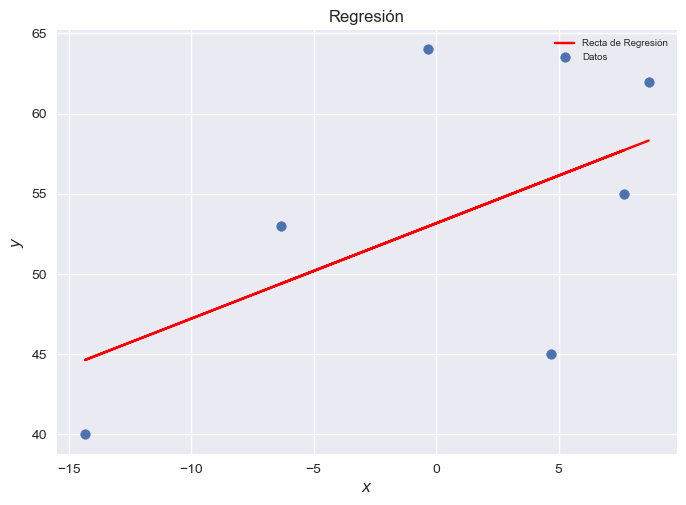

In [10]:
plot(x,α .+ β.*x,label = "Recta de Regresión", color = "red")
scatter(x,y,label = "Datos")
title("Regresión")
xlabel(L"x")
ylabel(L"y")
legend(prop = Dict("size" => 7));

In [22]:
##Eliminar punto y recalcular 
y1 = [62,45,55,64,53]
x1 = [x[i] for i ∈ [1,2,4,5,6]];

In [23]:
β1 = sum((x1 .- mean(x1)).*(y1.-mean(y1)))/sum((x1 .- mean(x1)).^2)
α1 = mean(y1) - β1*mean(x1);

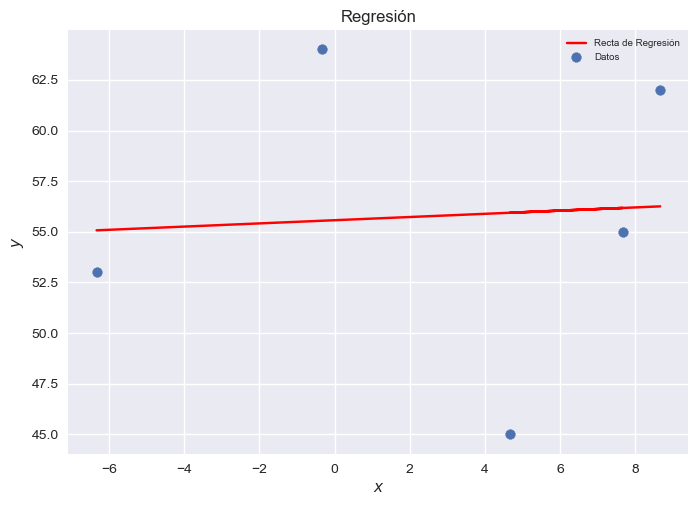

In [24]:
plot(x1,α1.+ β1.*x1,label = "Recta de Regresión", color = "red")
scatter(x1,y1,label = "Datos")
title("Regresión")
xlabel(L"x")
ylabel(L"y")
legend(prop = Dict("size" => 7));

In [25]:
##Puntual 
α + β*88 

105.49889258028793

In [26]:
n = length(x)
x0 = 88
s = sqrt(sum((y.-α.-β.*x).^2)./(n-2))
##Intervalo 
α .+ β*88 .+ [-1,1].*quantile(TDist(n-2),0.05/2).*s.*sqrt(1/n + ((x0 - mean(x))^2)/(sum((x .-mean(x)).^2))).^(1/2)

2-element Array{Float64,1}:
 155.74060799009453
  55.25717717048134

In [27]:
n = length(x)
x0 = 88
s = sqrt(sum((y.-α.-β.*x).^2)./(n-2))
##Intervalo 
α .+ β*88 .+ [-1,1].*quantile(TDist(n-2),0.05/2).*s.*sqrt(1 +1/n + ((x0 - mean(x))^2)/(sum((x .-mean(x)).^2))).^(1/2)

2-element Array{Float64,1}:
 156.3739037264678
  54.62388143410804

In [28]:
x2 = range(minimum(x),stop = maximum(x),length=100)
confl = α .+ β.*x2 .-quantile(TDist(n-2),0.05/2).*s.*(1/n.+((x2 .- mean(x)).^2)./(sum((x .-mean(x)).^2))).^(1/2)
confu = α .+ β.*x2 .+quantile(TDist(n-2),0.05/2).*s.*(1/n.+((x2 .- mean(x)).^2)./(sum((x .-mean(x)).^2))).^(1/2)
predl = α .+ β.*x2 .-quantile(TDist(n-2),0.05/2).*s.*(1 .+ 1/n .+ ((x2 .- mean(x)).^2)./(sum((x .-mean(x)).^2))).^(1/2)
predu = α .+ β.*x2 .+quantile(TDist(n-2),0.05/2).*s.*(1 .+ 1/n .+ ((x2 .- mean(x)).^2)./(sum((x .-mean(x)).^2))).^(1/2);

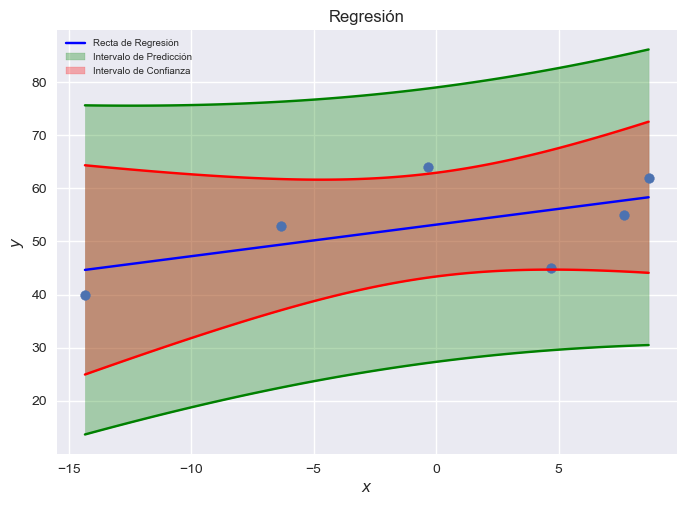

In [29]:
plot(x2, α .+ β.*x2, label = "Recta de Regresión", color = "blue")
plot(x2,confl,color="red")
plot(x2,confu,color="red")
plot(x2,predl,color="green")
plot(x2,predu,color="green")
fill_between(x2,predu,predl,alpha=0.3,color="green", label = "Intervalo de Predicción")
fill_between(x2,confu,confl,alpha=0.3,color="red",label = "Intervalo de Confianza")
scatter(x,y)
title("Regresión")
xlabel(L"x")
ylabel(L"y")
legend(prop = Dict("size" => 7));

5-element Array{Float64,1}:
  8.666666666666666
  4.666666666666667
  7.666666666666667
 -0.3333333333333333
 -6.333333333333333